In [1]:
#Basic libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#DeepLearning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
##from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#from keras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [2]:
#pip install scikeras

In [3]:
#pip install --upgrade tensorflow

In [4]:
#pip install utils

In [5]:
#pip install --upgrade keras

In [6]:
#pip install pydot

In [7]:
#pip install seaborn

In [8]:
#!pip install tensorflow==2.18.0

In [9]:
#pip install keras==3.5.0

In [10]:
#pip install keras==2.2.4

In [11]:
#DIGIT MNIST DATASET
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)= mnist.load_data()

In [12]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

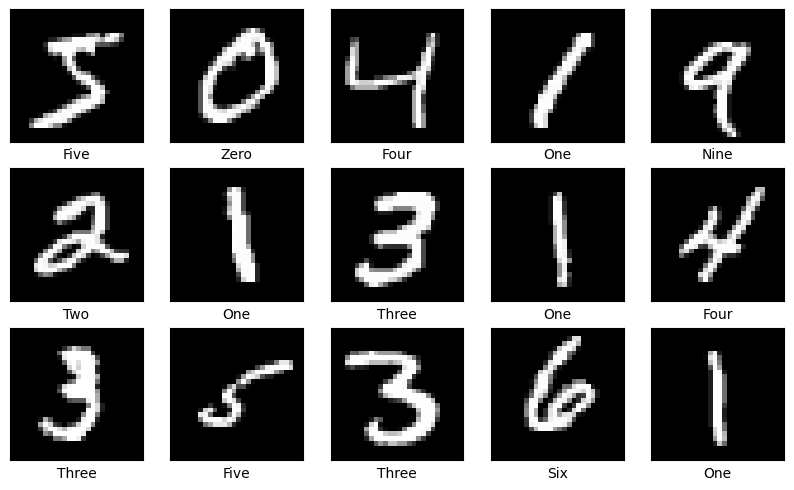

In [14]:
#Names of the numbers in dataset in numerical order
col_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [15]:
X_train_digit.shape

(60000, 28, 28)

In [16]:
#Input reshape from 3D to 2D --flattening 
X_train_digit = X_train_digit.reshape(60000,784)
X_test_digit = X_test_digit.reshape(10000,784)

In [17]:
X_train_digit.shape

(60000, 784)

In [18]:
#output conversion for ANN --- convert 1D output into categorical by onehot encoding 
y_test_digit.shape

(10000,)

In [19]:
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [20]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
#creating base neural network

model= keras.Sequential([layers.Dense(256, activation = 'relu', input_shape=(784,)),
                         layers.Dense(64, activation = 'relu', input_shape=(256,)),
                         layers.Dense(64, activation = 'relu' , input_shape=(64,)),
                         layers.Dense(10, activation= 'sigmoid'),
                        ])

C:\Users\abina\Anac\envs\virt\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#Denselayers parameter calculation ===> param_number= output channel_number* (input_channel_number+1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Refer keras.io/api/ for future compile parameters reference
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


In [24]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7648 - loss: 5.8277 - val_accuracy: 0.9114 - val_loss: 0.3862
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9342 - loss: 0.2757 - val_accuracy: 0.9422 - val_loss: 0.2528
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9579 - loss: 0.1600 - val_accuracy: 0.9504 - val_loss: 0.2196
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9687 - loss: 0.1103 - val_accuracy: 0.9552 - val_loss: 0.1830
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9719 - loss: 0.0929 - val_accuracy: 0.9565 - val_loss: 0.1798
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9737 - loss: 0.0853 - val_accuracy: 0.9625 - val_loss: 0.1700
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9769 - loss: 0.0750 - val_accuracy: 0.9655 - val_loss: 0.1531
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9775 - loss: 0.0754 - val_accuracy: 0.

In [25]:
#Predicting the labels-Digit
y_predict= model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
y_predict

array([[5.3532962e-03, 3.1927046e-01, 8.6520547e-03, ..., 1.0000000e+00,
        1.6756039e-03, 9.9997127e-01],
       [8.4515065e-03, 9.9999607e-01, 1.0000000e+00, ..., 9.9999744e-01,
        9.9997663e-01, 1.3865009e-01],
       [1.4241012e-04, 9.9999946e-01, 7.4597330e-05, ..., 5.3215418e-03,
        7.2887342e-04, 1.0454436e-07],
       ...,
       [6.9742985e-03, 9.9473250e-01, 9.7513217e-01, ..., 9.9999923e-01,
        9.9999261e-01, 1.0000000e+00],
       [9.0448417e-02, 9.4443240e-04, 3.6767442e-04, ..., 8.2077819e-01,
        9.9809748e-01, 2.1208097e-01],
       [9.9979341e-01, 9.9985397e-01, 1.0000000e+00, ..., 8.2594138e-01,
        9.9775571e-01, 1.8040751e-01]], dtype=float32)

In [27]:
y_predict[0]

array([5.3532962e-03, 3.1927046e-01, 8.6520547e-03, 9.9996728e-01,
       9.9984294e-01, 4.8859042e-01, 5.9368612e-13, 1.0000000e+00,
       1.6756039e-03, 9.9997127e-01], dtype=float32)

In [28]:
y_predicts=np.argmax(y_predict, axis=1) #Here we get the index of maximum value in the encoded vector

In [29]:
y_predicts

array([7, 2, 1, ..., 4, 5, 2], dtype=int64)

In [30]:
y_test_digit_eval= np.argmax(y_test_digit, axis=1)

In [31]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

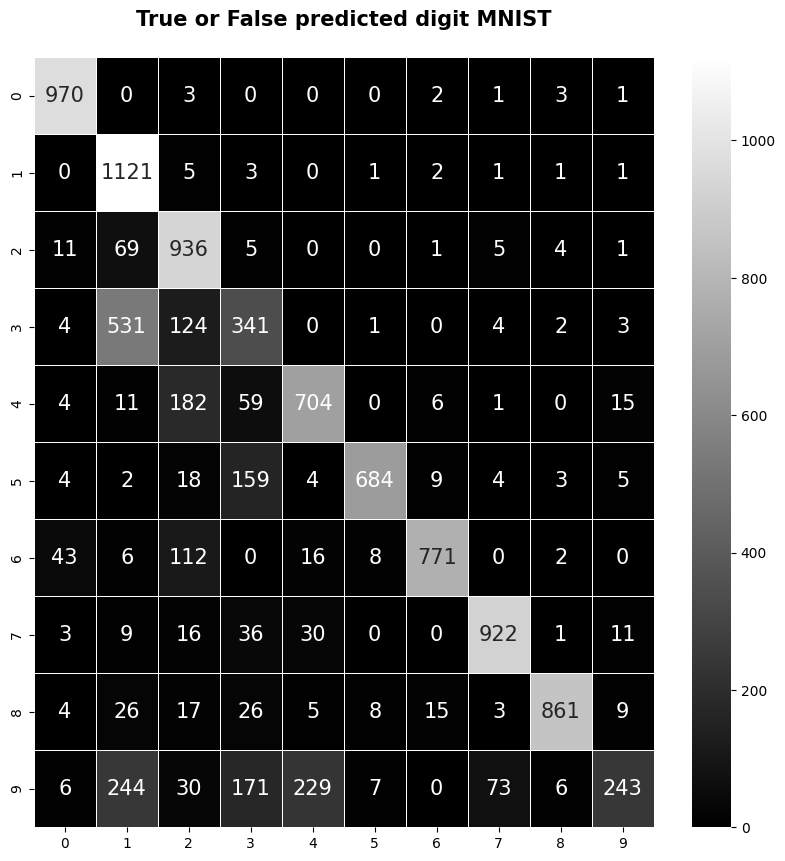

In [32]:
#confusion matrix
con_matrix= confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix,annot=True,annot_kws={'size':15}, linewidth=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [33]:
print(plt.style.available) #to check the available style for the above line code

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval, y_predicts))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       980
           1       0.56      0.99      0.71      1135
           2       0.65      0.91      0.76      1032
           3       0.43      0.34      0.38      1010
           4       0.71      0.72      0.71       982
           5       0.96      0.77      0.85       892
           6       0.96      0.80      0.87       958
           7       0.91      0.90      0.90      1028
           8       0.98      0.88      0.93       974
           9       0.84      0.24      0.37      1009

    accuracy                           0.76     10000
   macro avg       0.79      0.75      0.74     10000
weighted avg       0.78      0.76      0.74     10000



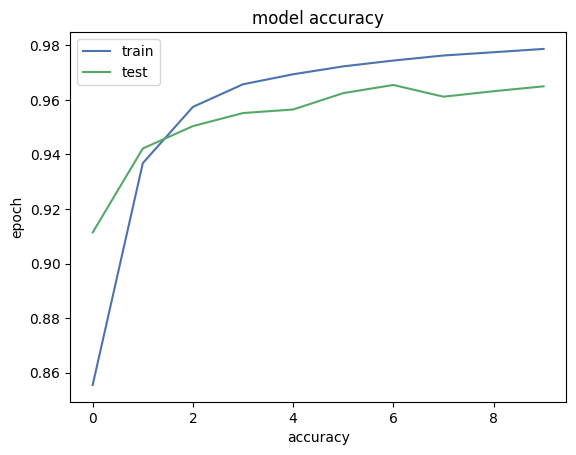

In [35]:
#summarize histroy for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

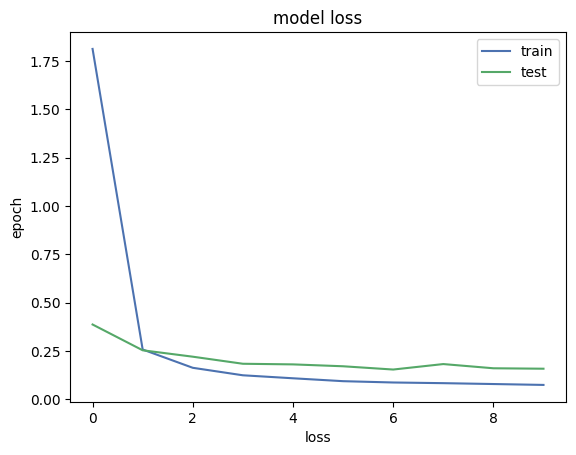

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [40]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) #Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


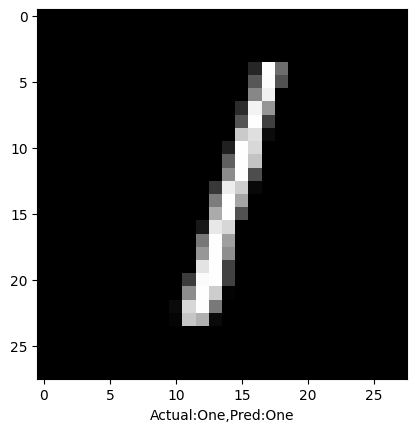

In [41]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray') #to make the matrix format into image format after reshaping it
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()